# Web Scraping for Indeed.com & Predicting Salaries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

ds_1 = pd.read_csv('ds_jobs_1.csv')
ds_2 = pd.read_csv('ds_jobs_2.csv')
ds_3 = pd.read_csv('ds_jobs_3.csv')
ds_4 = pd.read_csv('ds_jobs_4.csv')
ds_5 = pd.read_csv('ds_jobs_5.csv')
ds = pd.concat([ds_1, ds_2, ds_3, ds_4, ds_5])
print ds_1.shape, ds.shape
# ds_1 shape (67440, 5)
ds.head(10)

(67440, 5) (283365, 5)


,Unnamed: 0,location,company,title,salary
0,0,"Houston, TX 77032",Halliburton,Statistician,NaN
1,1,"Houston, TX",Halliburton,Senior Scientist - PhD,NaN
2,2,"Houston, TX 77032",Halliburton,Sr. Scientist,NaN
3,3,"Baytown, TX 77520",ExxonMobil,Polymer Material Informatics Research Scientist,NaN
4,4,"Houston, TX",MD Anderson Cancer Center,Institute Research Scientist - Center for Co-C...,"$95,000 - $142,000 a year"
5,5,"Houston, TX 77042 (West Houston area)",Tessella,Senior Oil & Gas Analytics Consultant,NaN
6,6,"Houston, TX",Rice University,Research Analyst,NaN
7,7,"Houston, TX",MD Anderson Cancer Center,Research Scientist,NaN
8,8,"Houston, TX",Accenture,Data Science Cross Industry Lead,NaN
9,9,"Houston, TX 77030 (Medical area)",Houston Methodist,Scientist,NaN


In [3]:
ds.columns

Index([u'Unnamed: 0', u'location', u'company', u'title', u'salary'], dtype='object')

In [4]:
ds.drop('Unnamed: 0', axis=1, inplace=True)
print ds.shape

(283365, 4)


In [5]:
print ds['salary'].isnull().sum()
# Drop jobs without salaries
ds_clean = ds[ds['salary'].notnull()].reset_index()

262510


In [7]:
# Erase repeated rows

mask = [False] * len(ds_clean)
for i in range(len(ds_clean)-1):
        if mask[i]:
            pass
        else:
            mask_i = [False] * len(ds_clean)
            mask_i[i+1:] = (ds_clean.ix[i,1:] == ds_clean.ix[i+1:,1:]).sum(axis=1) >= 4
            mask = [current or m for current,m in zip(mask_i,mask)]

print sum(mask), len(mask)

ds_clean = ds_clean[list(~np.array(mask))]
ds_clean.reset_index(drop=True, inplace=True)

print ds_clean.shape
ds_clean.head(10)
# Original size was 200
# After second scrapping -> 408


20284 20855
(571, 5)


,index,location,company,title,salary
0,4,"Houston, TX",MD Anderson Cancer Center,Institute Research Scientist - Center for Co-C...,"$95,000 - $142,000 a year"
1,10,"Houston, TX",Genialis,Bioinformatics Software Developer,"$50,000 - $80,000 a year"
2,16,"Houston, TX",MD Anderson Cancer Center,Research Statistical Analyst - Biostatistics,"$66,400 - $99,600 a year"
3,19,"Houston, TX",MD Anderson Cancer Center,"Sr Research Scientist - Immunology, Flow Cytom...","$57,200 - $85,800 a year"
4,23,"Houston, TX",MD Anderson Cancer Center,Senior Research Assistant - Neurosurgery Research,"$38,000 - $57,000 a year"
5,29,"Houston, TX",MD Anderson Cancer Center,Research Statistical Analyst -Bioinformatics &...,"$66,400 - $99,600 a year"
6,51,"Houston, TX",MD Anderson Cancer Center,Computational Scientist,"$76,400 - $114,600 a year"
7,55,"Houston, TX",MD Anderson Cancer Center,Research Scientist - LCMS,"$51,600 - $64,500 a year"
8,62,"Houston, TX",MD Anderson Cancer Center,Institute Associate Scientist IV - Neuroinflam...,"$72,500 - $108,500 a year"
9,65,"Houston, TX",MD Anderson Cancer Center,Institute Associate Scientist II - In Vivo Pha...,"$46,500 - $83,000 a year"


In [8]:
ds_clean['salary'].value_counts()

# Have to avergare ranges and convert all to one unit, year.

$120,000 a year               14
$70,286 - $88,213 a year      10
$150,000 a year                9
$160,000 a year                9
$100,000 a year                9
$50,000 a year                 8
$180,000 a year                6
$6,250 - $10,833 a month       6
$130,000 a year                6
$59,708 - $65,678 a year       6
$140,000 a year                5
$125,000 a year                5
$5,400 - $6,500 a month        5
$70,286 - $80,829 a year       5
$130,000 - $140,000 a year     5
$90,000 a year                 4
$100,000 - $130,000 a year     4
$150,000 - $200,000 a year     4
$200,000 a year                4
$4,319 - $6,371 a month        4
$170,000 a year                4
$59,708 - $72,246 a year       4
$100,000 - $120,000 a year     4
$50 an hour                    4
$140,000 - $180,000 a year     3
$185,000 a year                3
$78,630 - $103,332 a year      3
$65,000 - $75,000 a year       3
$55,000 - $65,000 a year       3
$100,000 - $150,000 a year     3
          

In [9]:
def salary_cleaner(s):
    # Erase '$' sign
    s2 = s.replace('$','')
    # Replace ',' for '.'
    s2 = s2.replace(',','.')
    return s2

def salary_data(s,s_or_r=True):
    # Serparate salary and unit
    salary_unit = s.split(' a ')
    if len(salary_unit) == 1:
        salary_unit = s.split(' an ')
    unit = salary_unit[1]
    ss = salary_unit[0]
    
    # Separate ranges and convert them to float
    splitted = [float(i) for i in ss.split(' - ')]
    
    # If there is more than one element, there is a range
    if len(splitted) > 1:
        range_ = splitted[1] - splitted[0]
        salary = np.mean(splitted)
    else:
        range_ = 0
        salary = splitted[0]
    if s_or_r:
        if unit == 'month':
            salary = salary * 12
        elif unit == 'week':
            salary = salary * 4 * 12 / 1000.
        elif unit == 'day':
            salary = salary * 5 * 4 * 12 / 1000.
        elif unit == 'hour':
            salary = salary * 8 * 5 * 4 * 12 / 1000.
        elif unit == 'year':
            pass
        else:
            print unit
            raise('warning')
        return salary
    else:
        return range_


In [10]:
ds_clean.head(20)

,index,location,company,title,salary
0,4,"Houston, TX",MD Anderson Cancer Center,Institute Research Scientist - Center for Co-C...,"$95,000 - $142,000 a year"
1,10,"Houston, TX",Genialis,Bioinformatics Software Developer,"$50,000 - $80,000 a year"
2,16,"Houston, TX",MD Anderson Cancer Center,Research Statistical Analyst - Biostatistics,"$66,400 - $99,600 a year"
3,19,"Houston, TX",MD Anderson Cancer Center,"Sr Research Scientist - Immunology, Flow Cytom...","$57,200 - $85,800 a year"
4,23,"Houston, TX",MD Anderson Cancer Center,Senior Research Assistant - Neurosurgery Research,"$38,000 - $57,000 a year"
5,29,"Houston, TX",MD Anderson Cancer Center,Research Statistical Analyst -Bioinformatics &...,"$66,400 - $99,600 a year"
6,51,"Houston, TX",MD Anderson Cancer Center,Computational Scientist,"$76,400 - $114,600 a year"
7,55,"Houston, TX",MD Anderson Cancer Center,Research Scientist - LCMS,"$51,600 - $64,500 a year"
8,62,"Houston, TX",MD Anderson Cancer Center,Institute Associate Scientist IV - Neuroinflam...,"$72,500 - $108,500 a year"
9,65,"Houston, TX",MD Anderson Cancer Center,Institute Associate Scientist II - In Vivo Pha...,"$46,500 - $83,000 a year"


In [11]:
# Clean Salary
ds_clean['salary'] = ds_clean['salary'].apply(salary_cleaner)
# Get salary mean
ds_clean['salary'] = ds_clean['salary'].apply(salary_data)

# Should I check this out?
#ds_clean['salary_range'] = ds_clean['salary'].apply(salary_data, args = (False,))

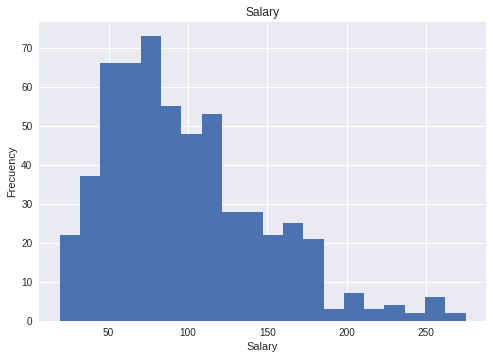

In [12]:
# Plot to see if the salaries collected make sense

ds_clean['salary'].hist(bins=20)
plt.title("Salary")
plt.xlabel("Salary")
plt.ylabel("Frecuency")
plt.show()

In [13]:
ds_clean['location'].value_counts()

New York, NY                                         83
Chicago, IL                                          51
Seattle, WA                                          41
Atlanta, GA                                          29
Los Angeles, CA                                      26
Houston, TX                                          23
Austin, TX                                           23
San Francisco, CA                                    22
Queens, NY                                           20
Manhattan, NY                                        18
Phoenix, AZ                                          16
Philadelphia, PA                                     11
Coral Gables, FL                                      9
Portland, OR                                          8
Berkeley, CA                                          7
Chicago, IL 60603 (Loop area)                         6
Austin, TX 78758 (North Austin area)                  5
Dallas, TX                                      

In [14]:
def location_split(s):
    return s.split(', ')[1][0:2]

In [15]:
# Clean location
ds_clean['location'] = ds_clean['location'].apply(location_split)

In [16]:
ds_clean['location'].value_counts()

NY    158
CA     96
IL     68
TX     67
WA     51
GA     35
PA     27
FL     20
AZ     20
OR     12
CO     12
DE      4
NJ      1
Name: location, dtype: int64

In [17]:
# How many 'small' companies? Strong assumption: companies that have two job postings are small
ds_companies = ds_clean.company.value_counts()
print ds_companies.head()
print ds_companies.value_counts().sort_values(ascending=False).head()

print ds_clean.shape, ds_companies.shape[0]

Workbridge Associates            37
DEPT OF HEALTH/MENTAL HYGIENE    25
Jobspring Partners               22
University of Texas at Austin    18
Harnham                          16
Name: company, dtype: int64
1    169
2     32
3     13
4     10
5      5
Name: company, dtype: int64
(571, 5) 246


In [18]:
ds_clean[ds_clean['location'] == 'TX'].head(20)

,index,location,company,title,salary
0,4,TX,MD Anderson Cancer Center,Institute Research Scientist - Center for Co-C...,118.500
1,10,TX,Genialis,Bioinformatics Software Developer,65.000
2,16,TX,MD Anderson Cancer Center,Research Statistical Analyst - Biostatistics,83.000
3,19,TX,MD Anderson Cancer Center,"Sr Research Scientist - Immunology, Flow Cytom...",71.500
4,23,TX,MD Anderson Cancer Center,Senior Research Assistant - Neurosurgery Research,47.500
5,29,TX,MD Anderson Cancer Center,Research Statistical Analyst -Bioinformatics &...,83.000
6,51,TX,MD Anderson Cancer Center,Computational Scientist,95.500
7,55,TX,MD Anderson Cancer Center,Research Scientist - LCMS,58.050
8,62,TX,MD Anderson Cancer Center,Institute Associate Scientist IV - Neuroinflam...,90.500
9,65,TX,MD Anderson Cancer Center,Institute Associate Scientist II - In Vivo Pha...,64.750


In [20]:
ds_clean['title'].value_counts().head()

Data Scientist                             35
Senior Data Scientist                      13
Lead Data Scientist                         8
Quantitative Analyst                        6
Predictive Analytics (Machine Learning)     5
Name: title, dtype: int64

In [21]:
ds_clean.to_csv(path_or_buf='ds.csv', encoding='utf8')

In [ ]:
# Using this to only clean data
# model_code_project_4.ipyb is the following step